# California House Prediction

## Important libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

In [42]:
df = pd.read_csv('housing.csv')

In [43]:
pd.set_option('display.max_columns', None)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Imputing missing values through KMeans Imputation

In [44]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## **Imputing Missing Values**

In [45]:
from sklearn.neighbors import KNeighborsRegressor 

In [46]:
def knn_imputation(dataframe, na_column):
    df = dataframe.copy()
    
    numeric_columns = df.select_dtypes(np.number)
    non_na_columns = numeric_columns.loc[:, numeric_columns.isna().sum() == 0].columns
    
    X_train = numeric_columns.loc[numeric_columns[na_column].isna() == False , non_na_columns]
    y_train = numeric_columns.loc[numeric_columns[na_column].isna() == False , na_column]
    X_test = numeric_columns.loc[numeric_columns[na_column].isna() == True , non_na_columns]

    kmeans = KNeighborsRegressor()
    kmeans.fit(X_train, y_train)
    
    y_preds = kmeans.predict(X_test)
    
    df.loc[df[na_column].isna() == True , na_column] = y_preds
    
    return df

In [47]:
df = knn_imputation(df, 'total_bedrooms')

## Data Processing

In [48]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Numerical Variables

In [50]:
numerical_df = df.select_dtypes(np.number)
numerical_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

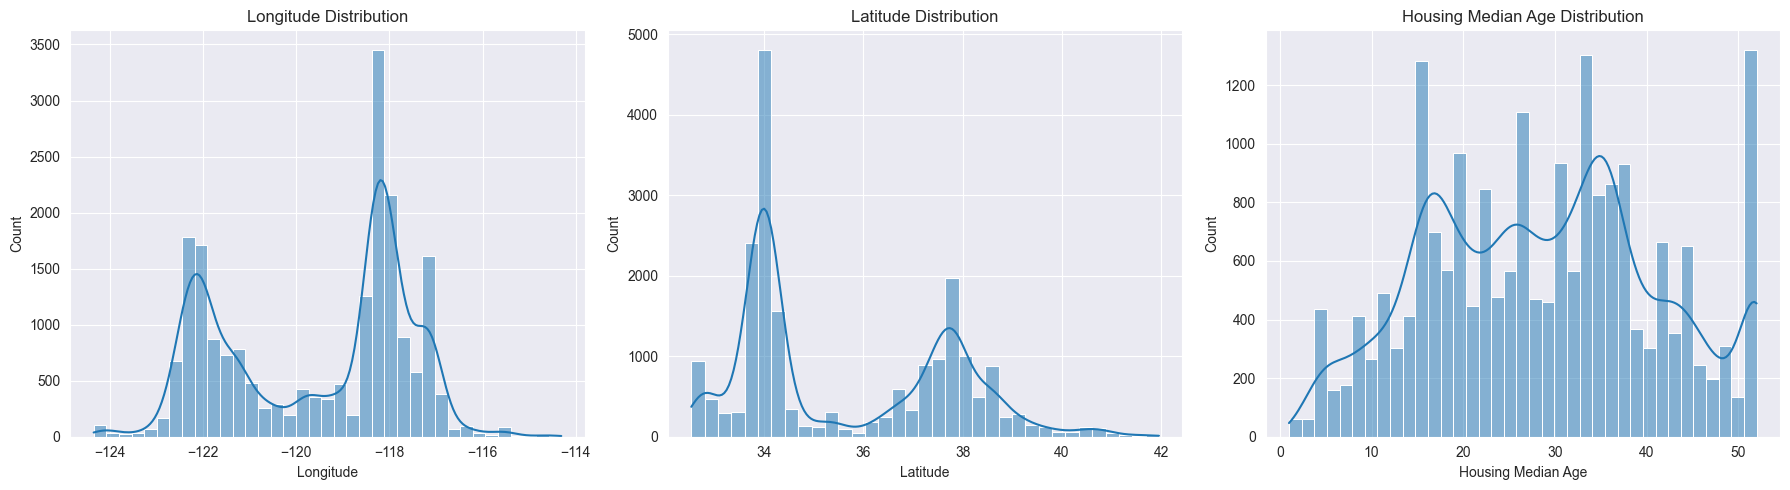

In [51]:
# Assuming df is your DataFrame
plt.figure(figsize=(18, 5))  # Adjust the figure size as needed

# Plot 1: Longitude Distribution
plt.subplot(1, 3, 1)
sns.histplot(x='longitude', data=df, kde=True)
plt.title('Longitude Distribution')
plt.xlabel('Longitude')

# Plot 2: Latitude Distribution
plt.subplot(1, 3, 2)
sns.histplot(x='latitude', data=df, kde=True)
plt.title('Latitude Distribution')
plt.xlabel('Latitude')

# Plot 3: Housing Median Age Distribution
plt.subplot(1, 3, 3)
sns.histplot(x='housing_median_age', data=df, kde=True)
plt.title('Housing Median Age Distribution')
plt.xlabel('Housing Median Age')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

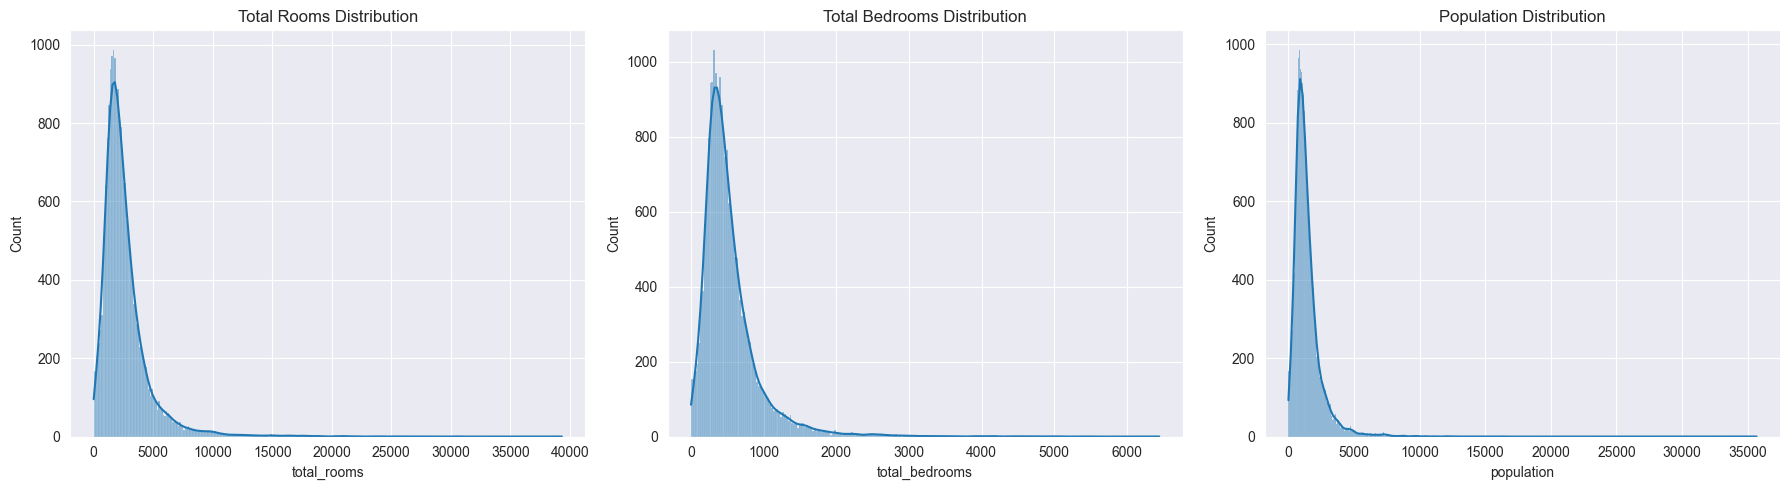

In [52]:
# Assuming df is your DataFrame
plt.figure(figsize=(18, 5))  # Adjust the figure size as needed

# Plot 1: Longitude Distribution
plt.subplot(1, 3, 1)
sns.histplot(x='total_rooms', data=df, kde=True)
plt.title('Total Rooms Distribution')
plt.xlabel('total_rooms')

# Plot 2: Latitude Distribution
plt.subplot(1, 3, 2)
sns.histplot(x='total_bedrooms', data=df, kde=True)
plt.title('Total Bedrooms Distribution')
plt.xlabel('total_bedrooms')

# Plot 3: Housing Median Age Distribution
plt.subplot(1, 3, 3)
sns.histplot(x='population', data=df, kde=True)
plt.title('Population Distribution')
plt.xlabel('population')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

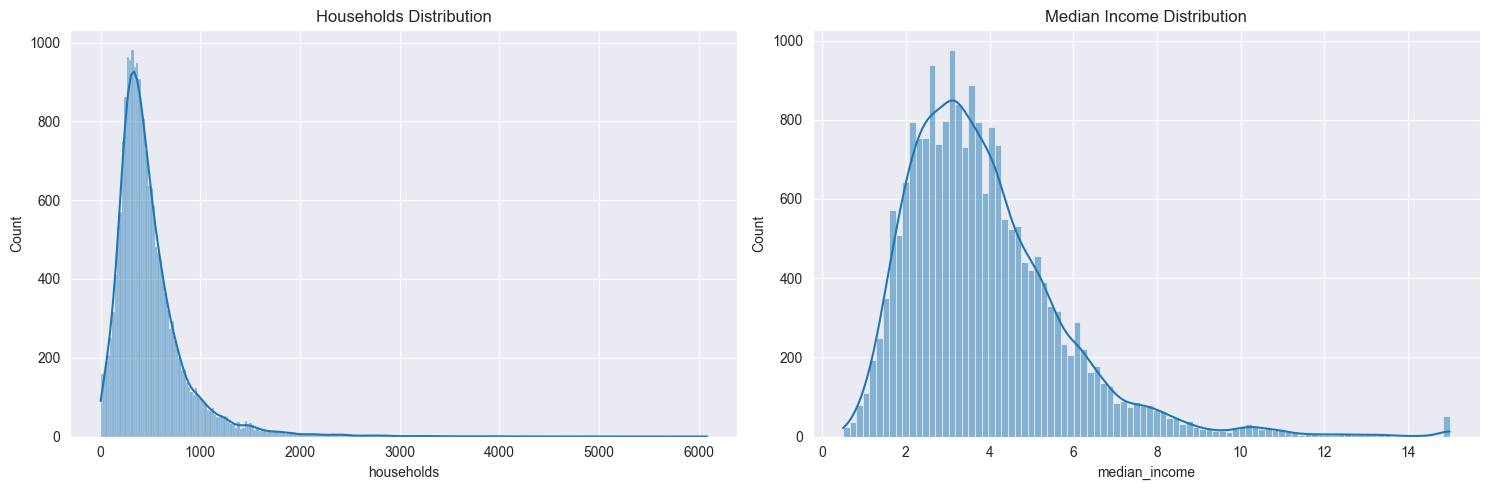

In [53]:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Plot 1: Longitude Distribution
plt.subplot(1, 2, 1)
sns.histplot(x='households', data=df, kde=True)
plt.title('Households Distribution')
plt.xlabel('households')

# Plot 2: Latitude Distribution
plt.subplot(1, 2, 2)
sns.histplot(x='median_income', data=df, kde=True)
plt.title('Median Income Distribution')
plt.xlabel('median_income')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## Check numerical skewed columns

In [54]:
from scipy.stats import skew

In [55]:
df_skew = pd.DataFrame({'columns': df.select_dtypes(np.number).columns})
df_skew['skew'] = df_skew['columns'].apply(lambda col: skew(df[col]))
df_skew['abs_skew'] = df_skew['skew'].apply(lambda skew: abs(skew))
df_skew['skewness'] = df_skew['abs_skew'].apply(lambda abs_skew: True if abs_skew >= 1 else False)
df_skew

,columns,skew,abs_skew,skewness
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.454561,3.454561,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,median_house_value,0.977692,0.977692,False


In [56]:
skew_cols = df_skew.query("skewness == True")['columns'].tolist()
print(skew_cols)

['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [57]:
for col in skew_cols:
    df[col] = np.log(df[col])

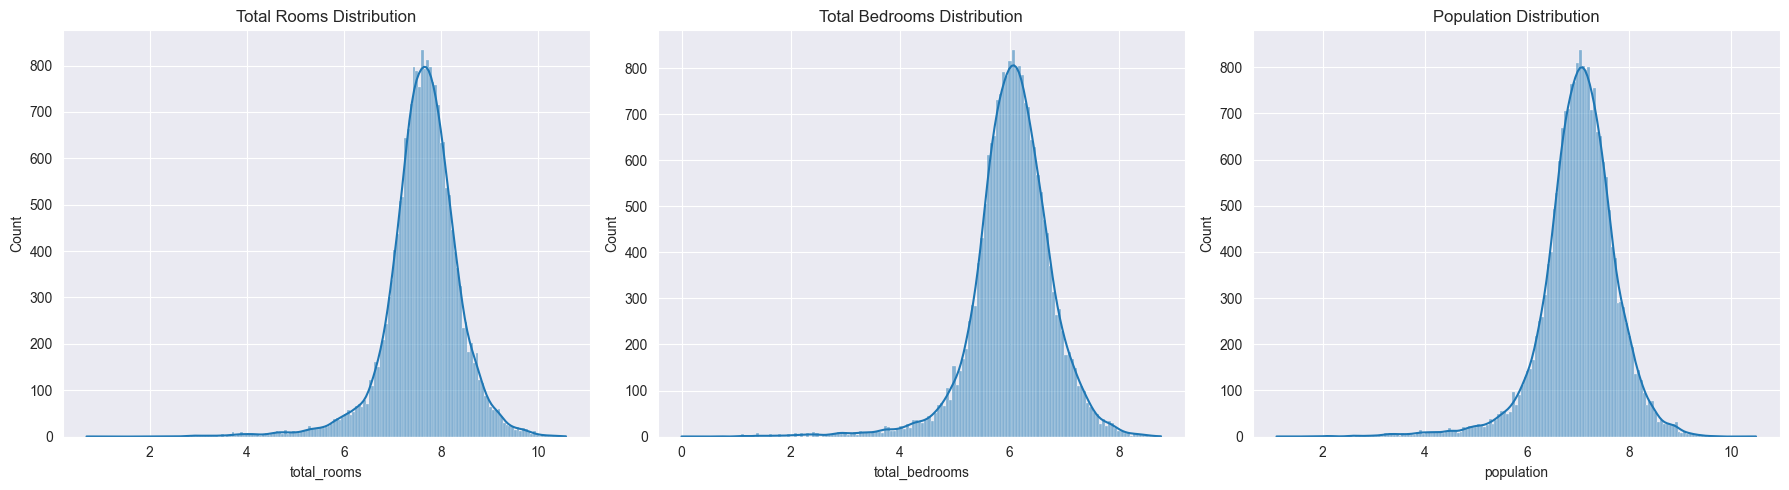

In [58]:
# Assuming df is your DataFrame
plt.figure(figsize=(18, 5))  # Adjust the figure size as needed

# Plot 1: Longitude Distribution
plt.subplot(1, 3, 1)
sns.histplot(x='total_rooms', data=df, kde=True)
plt.title('Total Rooms Distribution')
plt.xlabel('total_rooms')

# Plot 2: Latitude Distribution
plt.subplot(1, 3, 2)
sns.histplot(x='total_bedrooms', data=df, kde=True)
plt.title('Total Bedrooms Distribution')
plt.xlabel('total_bedrooms')

# Plot 3: Housing Median Age Distribution
plt.subplot(1, 3, 3)
sns.histplot(x='population', data=df, kde=True)
plt.title('Population Distribution')
plt.xlabel('population')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

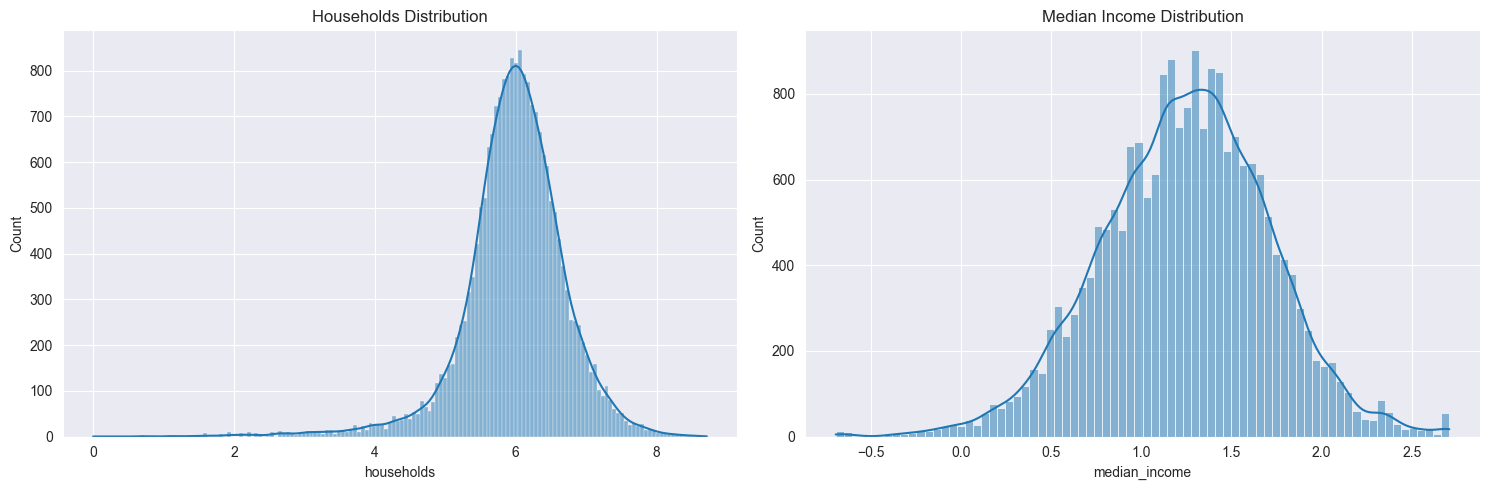

In [59]:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Plot 1: Longitude Distribution
plt.subplot(1, 2, 1)
sns.histplot(x='households', data=df, kde=True)
plt.title('Households Distribution')
plt.xlabel('households')

# Plot 2: Latitude Distribution
plt.subplot(1, 2, 2)
sns.histplot(x='median_income', data=df, kde=True)
plt.title('Median Income Distribution')
plt.xlabel('median_income')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## Pipeline 
1. Scaling numerical features
2. One hot encode categorical features

In [141]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [142]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [143]:
numerical_X = X.select_dtypes(np.number)

scaler = StandardScaler()
scaled_values = scaler.fit_transform(numerical_X)
X_scaled = pd.DataFrame(data=scaled_values, columns=numerical_X.columns)
X_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-1.129255,-1.627777,-1.692016,-1.561311,1.858786
1,-1.322844,1.043185,-0.607019,1.648839,1.308367,1.028461,1.440853,1.852703
2,-1.332827,1.038503,1.856182,-0.449227,-1.098660,-1.107018,-1.097678,1.567130
3,-1.337818,1.038503,1.856182,-0.636925,-0.808199,-0.947530,-0.807218,1.032566
4,-1.337818,1.038503,1.856182,-0.311482,-0.568786,-0.930649,-0.578372,0.218044
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.280761,-0.173237,-0.385615,-0.247885,-1.698929
20636,-0.818722,1.806329,-0.845393,-1.439476,-1.421680,-1.556094,-1.697841,-0.649557
20637,-0.823713,1.778237,-0.924851,0.122265,0.181902,-0.148116,0.122682,-1.516731
20638,-0.873626,1.778237,-0.845393,-0.133391,-0.050992,-0.563455,-0.171521,-1.317404


In [144]:
X = X.drop(numerical_X.columns.values, axis=1)
X

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [145]:
X['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [146]:
X_preprocessed = pd.concat([X, X_scaled], axis=1)
X_preprocessed

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,NEAR BAY,-1.327835,1.052548,0.982143,-1.129255,-1.627777,-1.692016,-1.561311,1.858786
1,NEAR BAY,-1.322844,1.043185,-0.607019,1.648839,1.308367,1.028461,1.440853,1.852703
2,NEAR BAY,-1.332827,1.038503,1.856182,-0.449227,-1.098660,-1.107018,-1.097678,1.567130
3,NEAR BAY,-1.337818,1.038503,1.856182,-0.636925,-0.808199,-0.947530,-0.807218,1.032566
4,NEAR BAY,-1.337818,1.038503,1.856182,-0.311482,-0.568786,-0.930649,-0.578372,0.218044
...,...,...,...,...,...,...,...,...,...
20635,INLAND,-0.758826,1.801647,-0.289187,-0.280761,-0.173237,-0.385615,-0.247885,-1.698929
20636,INLAND,-0.818722,1.806329,-0.845393,-1.439476,-1.421680,-1.556094,-1.697841,-0.649557
20637,INLAND,-0.823713,1.778237,-0.924851,0.122265,0.181902,-0.148116,0.122682,-1.516731
20638,INLAND,-0.873626,1.778237,-0.845393,-0.133391,-0.050992,-0.563455,-0.171521,-1.317404


In [147]:
X_preprocessed['ocean_proximity'] = X_preprocessed['ocean_proximity'].map({'ISLAND': 1,'NEAR OCEAN': 2, 'NEAR BAY': 3,'<1H OCEAN': 4,'INLAND': 5})

In [148]:
X_preprocessed

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,3,-1.327835,1.052548,0.982143,-1.129255,-1.627777,-1.692016,-1.561311,1.858786
1,3,-1.322844,1.043185,-0.607019,1.648839,1.308367,1.028461,1.440853,1.852703
2,3,-1.332827,1.038503,1.856182,-0.449227,-1.098660,-1.107018,-1.097678,1.567130
3,3,-1.337818,1.038503,1.856182,-0.636925,-0.808199,-0.947530,-0.807218,1.032566
4,3,-1.337818,1.038503,1.856182,-0.311482,-0.568786,-0.930649,-0.578372,0.218044
...,...,...,...,...,...,...,...,...,...
20635,5,-0.758826,1.801647,-0.289187,-0.280761,-0.173237,-0.385615,-0.247885,-1.698929
20636,5,-0.818722,1.806329,-0.845393,-1.439476,-1.421680,-1.556094,-1.697841,-0.649557
20637,5,-0.823713,1.778237,-0.924851,0.122265,0.181902,-0.148116,0.122682,-1.516731
20638,5,-0.873626,1.778237,-0.845393,-0.133391,-0.050992,-0.563455,-0.171521,-1.317404


## Target Variable processing

<Figure size 1200x800 with 0 Axes>

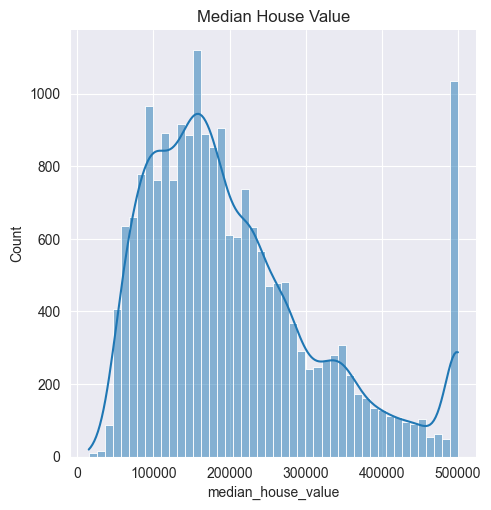

In [149]:
plt.figure(figsize=(12,8))
sns.displot(x=y, kde=True)
plt.title('Median House Value')
plt.xlabel('median_house_value')
plt.show()

<Figure size 1200x800 with 0 Axes>

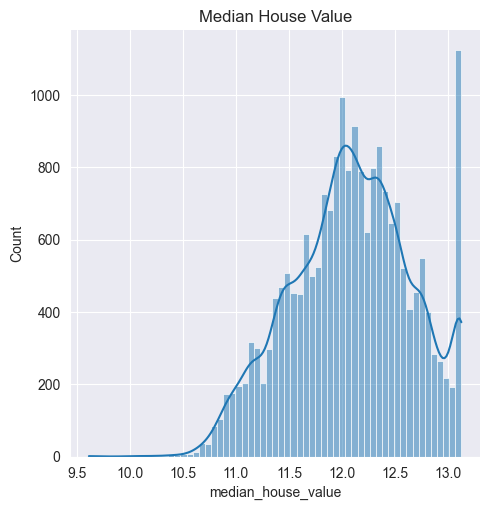

In [150]:
y_temp = np.log(y)
plt.figure(figsize=(12,8))
sns.displot(x=y_temp, kde=True)
plt.title('Median House Value')
plt.xlabel('median_house_value')
plt.show()

In [151]:
values_scaled = scaler.fit_transform(y.values.reshape(-1,1))
values_scaled

array([[ 2.12963148],
       [ 1.31415614],
       [ 1.25869341],
       ...,
       [-0.99274649],
       [-1.05860847],
       [-1.01787803]])

In [154]:
y_preprocessed = pd.DataFrame(data=values_scaled, columns=['median_house_value'])
y_preprocessed

,median_house_value
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900
...,...
20635,-1.115804
20636,-1.124470
20637,-0.992746
20638,-1.058608


## Pytorch

In [160]:
X_np = X_preprocessed.values
y_np = y_preprocessed.values

X_tensor = torch.tensor(X_np, dtype=torch.float)
y_tensor = torch.tensor(y_np, dtype=torch.float)

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [165]:
X_train.shape, X_dev.shape, X_test.shape

(torch.Size([16512, 9]), torch.Size([2064, 9]), torch.Size([2064, 9]))

In [167]:
input_size = 9
hidden_sizes = [5, 5, 5]  # Adjust the number of hidden layers and sizes
output_size = 1  # For regression

class CalifornicaHousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        # Define the hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_sizes[i], hidden_sizes[i+1]) for i in range(len(hidden_sizes) - 1)
        ])
        # Define the output layer
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
        
    def forward(self, x):
        # Input layer
        x = torch.relu(self.input_layer(x))
        # Hidden layers
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        # Output layer (for regression, often no activation function is applied)
        x = self.output_layer(x)

        return x

In [174]:
california_regression = CalifornicaHousingModel()

In [179]:
device = 'cuda' if torch.cuda.is_available() else 'gpu'

In [180]:
california_regression= california_regression.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=california_regression.parameters(),
                                lr=0.01)

In [181]:
epochs = 1000
epochs_count = []
train_loss_list = []
dev_loss_list = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_dev, y_dev = X_dev.to(device), y_dev.to(device)

for epoch in range(epochs):
    
    california_regression.train()
    
    y_train_preds = california_regression(X_train)
    
    loss_train = loss_fn(y_train_preds, y_train)
    
    optimizer.zero_grad()
    
    loss_train.backward()
    
    optimizer.step()
    
    california_regression.eval()
    with torch.inference_mode():
        y_dev_preds = california_regression(X_dev)
        loss_dev = loss_fn(y_dev_preds, y_dev)
        
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_list.append(loss_train)
            dev_loss_list.append(loss_dev)
            print(f"Train loss at epoch {epoch} is {loss_train}")
            print(f"Dev loss at epoch {epoch} is {loss_dev}")
    

Train loss at epoch 0 is 1.1681593656539917
Dev loss at epoch 0 is 1.1026524305343628
Train loss at epoch 10 is 0.9779819250106812
Dev loss at epoch 10 is 0.9576425552368164
Train loss at epoch 20 is 0.8793526887893677
Dev loss at epoch 20 is 0.8622848391532898
Train loss at epoch 30 is 0.6509501934051514
Dev loss at epoch 30 is 0.6312980651855469
Train loss at epoch 40 is 0.4304654598236084
Dev loss at epoch 40 is 0.4372808039188385
Train loss at epoch 50 is 0.36101242899894714
Dev loss at epoch 50 is 0.3669619858264923
Train loss at epoch 60 is 0.3337191641330719
Dev loss at epoch 60 is 0.3457401692867279
Train loss at epoch 70 is 0.3139295279979706
Dev loss at epoch 70 is 0.32743969559669495
Train loss at epoch 80 is 0.30308932065963745
Dev loss at epoch 80 is 0.32029128074645996
Train loss at epoch 90 is 0.2967012822628021
Dev loss at epoch 90 is 0.3139381408691406
Train loss at epoch 100 is 0.2918601930141449
Dev loss at epoch 100 is 0.3099340498447418
Train loss at epoch 110 is 0

In [183]:
train_loss_list = np.array(torch.tensor(train_loss_list).detach().numpy())
dev_loss_list = np.array(torch.tensor(dev_loss_list).detach().numpy())

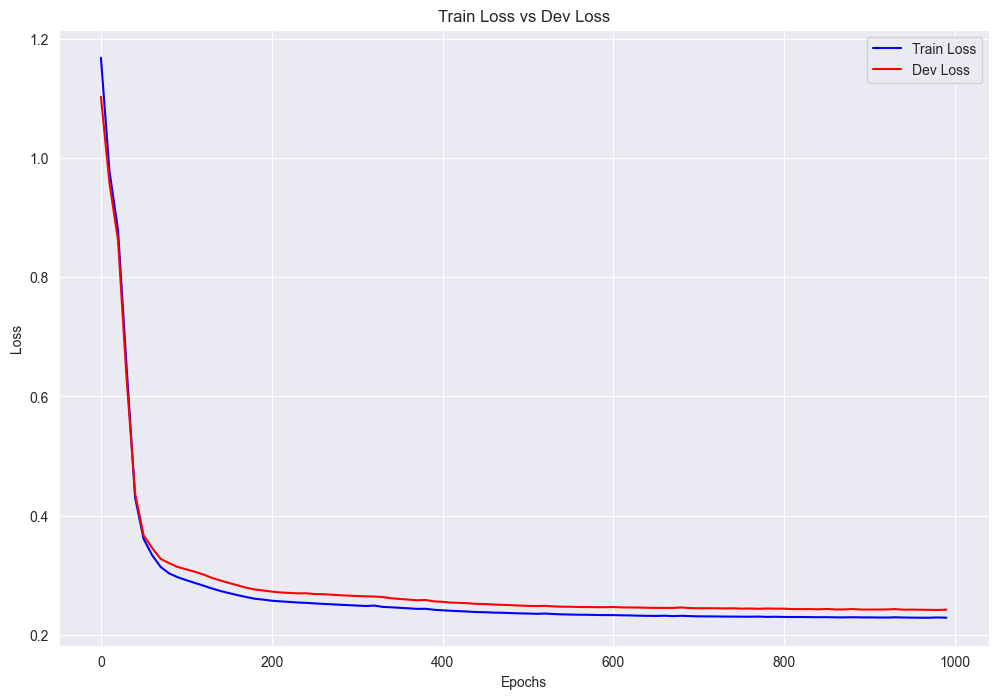

In [185]:
plt.figure(figsize=(12,8))
plt.plot(epochs_count, train_loss_list, c='b', label='Train Loss')
plt.plot(epochs_count, dev_loss_list, c='r', label='Dev Loss')
plt.title("Train Loss vs Dev Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()